# Введение

Наш проект — это не просто сервис аналитики сайтов, это целая экосистема, поддерживающая принятие информированных решений. Мы амбициозно замахиваемся на реализацию современных методологий и технологий, применяя машинное обучение и облачные вычисления для обеспечения нашим пользователям непрерывного доступа к качественным, релевантным и своевременным данным.

Основой нашего сервиса являются данные, которые мы собираем из нескольких открытых источников. Они охватывают обширный спектр параметров сайтов: от общего количества пользователей в месяц до специфических деталей, таких как Alexa Rank — метрика, представляющая популярность сайта, исчисляемую на основе его трафика и количества уникальных посетителей.

В нашем мире данные — это новое золото, но они часто бывают несовершенными. С проблемой недостающих данных мы столкнулись и мы. В частности, ключевой показатель нашего исследования — количество уникальных пользователей в месяц (UniqueUsers) — не всегда доступен. Отсутствие этих данных может подорвать качество предоставляемой нами информации, и мы обратились к мощи машинного обучения, чтобы заполнить эти пробелы.

Для прогнозирования количества уникальных пользователей мы используем несколько фичей:

    Visits: общее количество посещений веб-сайта.
    PagesPerVisit: среднее количество страниц, просмотренных посетителями во время их визита.
    BounceRate: процент посетителей, которые покидают сайт после просмотра только одной страницы.
    AvgVisitDuration: среднее время, проведенное пользователем на сайте.
    Alexa: рейтинг Alexa, отражающий популярность веб-сайта.
    Summary и Summary_2: обобщенные характеристики сайта.
    Category: категория или отрасль, к которой относится сайт.

Все эти данные в совокупности позволяют нам создать эффективную и точную модель, способную предсказать количество уникальных пользователей на основе входных данных.

Однако, анализировать и обрабатывать огромные объемы данных требует значительных ресурсов. Исходя из этого, было принято решение о реализации прогнозирования в реальном времени — непосредственно при запросе пользователя. Таким образом, наш бэкенд обращается к API прогнозирования UniqueUsers и получает мгновенный ответ от модели машинного обучения.

Наша задача не ограничивается только обучением модели. Мы также разрабатываем и развертываем сервер Flask API, который будет обрабатывать GET-запросы в формате JSON с данными о сайте и отвечать прогнозами о количестве уникальных пользователей. Плюс ко всему, мы упаковываем наше приложение в Docker для обеспечения его простоты и универсальности при развертывании на любом сервере.

Архитектура нашего проекта строится вокруг автоматизации процессов. Мы используем GitLab CI/CD для автоматического развертывания нашего приложения на сервере после каждого коммита. Это позволяет нам быстро и эффективно тестировать новые функции и исправления на стадии разработки и, после одобрения архитектором проекта, переносить их на основной сервер.

В целом, мы смотрим в будущее с оптимизмом, твердо веря в силу технологий и нашей способности решать сложные проблемы. Наш проект — это важный шаг в сторону более информированного и прозрачного интернет-пространства.

## Декомпозиция задачи
#### Исследование:

1.1. Загрузка данных:
- Загрузка данных.
- Понимание структуры и формата данных.

1.2. Предварительная обработка данных:
- Перевод данных в нужный формат

1.3. Анализ данных:
- Описательная статистика.
- Корреляционный анализ для выявления связей между признаками.

1.4. Исследование моделей машинного обучения:
- Выбор подходящих моделей для тестирования.
- Проведение кросс-валидации и настройка гиперпараметров для каждой модели.
- Оценка эффективности каждой модели на основе метрик (например, MAE, MSE, RMSE).

1.5. Финальная валидация и сохранение модели:
- Проверка модели на тестовой выборке.
- Сохранение обученной модели для дальнейшего использования.

#### Создание файла utils.py:

2.1. Разработка функций для обработки данных:
- Функция для чтения данных из исходного источника.
- Функции для предобработки данных (например, заполнение пропусков, удаление выбросов, преобразование типов данных).

2.2. Разработка функций для работы с моделью:
- Функция для загрузки обученной модели.
- Функция для предсказания на основе модели.

#### Создание скрипта для дообучения:

3.1. Разработка функций для дообучения модели:
- Функция для загрузки новых данных.
- Функция для запуска процесса дообучения.

#### Создание сервера Flask:

4.1. Разработка маршрутов API:
- Создание маршрута для получения прогнозов.
- Создание маршрута для дообучения модели.

4.2. Интеграция с обученной моделью:
- Загрузка обученной модели при запуске сервера.
- Обработка запросов и возврат прогнозов.

#### Создание Dockerfile:

5.1. Определение базового образа.

5.2. Добавление инструкций для установки необходимых зависимостей.

5.3. Добавление инструкций для запуска сервера Flask.

#### Написание файла .gitlab-ci.yml:

6.1. Создание этапов CI/CD (например, сборка, тестирование, развертывание).

6.2. Определение задач для каждого этапа.

6.3. Добавление инструкций для автоматического развертывания приложения на сервере после коммита.

Как видите, каждый этап этой декомпозиции представляет собой важный шаг в создании и развертывании нашего сервера Flask с машинным обучением.

## 1.1, 1.2 Загрузка и обработка данных

In [158]:
import pandas as pd
import numpy as np
import time as tm
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [102]:
data = pd.read_json('data/find_query_big.json')
data.head()

,domain_name,visits,summary,engagement,alexa
0,google.com,"{'2021-08-01': 90508310745.0, '2021-09-01': 89...",{'2021-09-01': {'category': 'Computers_Electro...,"{'2021-09-01': {'AvgVisitDuration': 667, 'Page...",{'2021-09-01': {'popularityText': 1}}
1,rutracker.net,"{'2021-08-01': 4942037, '2021-09-01': 4662036}",{'2021-09-01': {'category': 'Computers_Electro...,"{'2021-09-01': {'AvgVisitDuration': 330, 'Page...",{'2021-09-01': {'popularityText': 6473}}
2,ria.ru,"{'2021-08-01': 151341242, '2021-09-01': 127056...",{'2021-09-01': {'category': 'News_and_Media'}},"{'2021-09-01': {'AvgVisitDuration': 175, 'Page...",{'2021-09-01': {'popularityText': 372}}
3,sportmaster.ru,"{'2021-08-01': 8478329, '2021-09-01': 8239956}",{'2021-09-01': {'category': 'Sports/Sports'}},"{'2021-09-01': {'AvgVisitDuration': 384, 'Page...",{'2021-09-01': {'popularityText': 7074}}
4,olimpbet.kz,"{'2021-08-01': 1753613, '2021-09-01': 2149507}",{'2021-09-01': {'category': 'Gambling/Sports_B...,"{'2021-09-01': {'AvgVisitDuration': 425, 'Page...",{'2021-09-01': {'popularityText': 54319}}


Данные представленны в формате json, что не очень удобно, надо распарсить их в двумерную таблицу

Напишем функции для форматирования каждого столбца

In [103]:
def visits(data):
    """
    non unique visits for last month
    """
    b = []
    err_counter = 0
    for i in range(data.shape[0]):
        try:
            timestamp_lst = list(map(lambda x: tm.mktime(datetime.strptime(x, "%Y-%m-%d").timetuple()),
                                     list(data.iloc[i, 1].keys())))
            max_1 = max(timestamp_lst)
            mean = data.iloc[i, 1][datetime.fromtimestamp(
                max_1).strftime("%Y-%m-%d")]
            b.append([i, mean])
        except:
            b.append([i, -1])
            err_counter += 1
    print('visits error: ', err_counter)
    return pd.Series(np.array(b).T[1])


In [104]:
# перезапишем visits в нужном формате
data['visits'] = visits(data)

visits error:  0


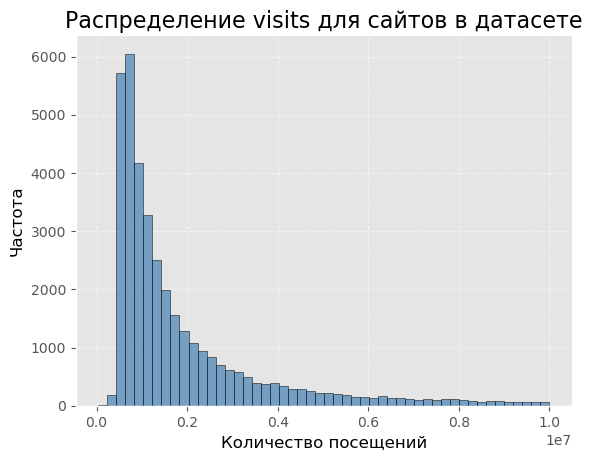

In [105]:
plt.style.use('ggplot')
fig, ax = plt.subplots()

ax.hist(data['visits'].loc[data['visits'] < 1e7], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
plt.title('Распределение visits для сайтов в датасете', fontsize=16)

plt.xlabel('Количество посещений', fontsize=12)
plt.ylabel('Частота', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)

plt.tick_params(axis='both', which='major', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=8)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

Сделаем тоже самое для остальных фичей

In [106]:
def unique_users(data):
    """
    unique users visits for last month
    """
    err_counter = 0
    c = []
    for i in range(data.shape[0]):
        try:
            uu = data.loc[i, 'engagement'][list(data.loc[i, 'engagement'].keys())[
                0]]['UniqueUsers']
            if uu is None:
                c.append(-1)
            else:
                c.append(uu)
        except:
            err_counter += 1
            c.append(-1)
    print('unique_users errors: ', err_counter)
    return pd.Series(c)

In [107]:
# перезапишем UniqueUsers в нужном формате
data['UniqueUsers'] = unique_users(data)

unique_users errors:  0


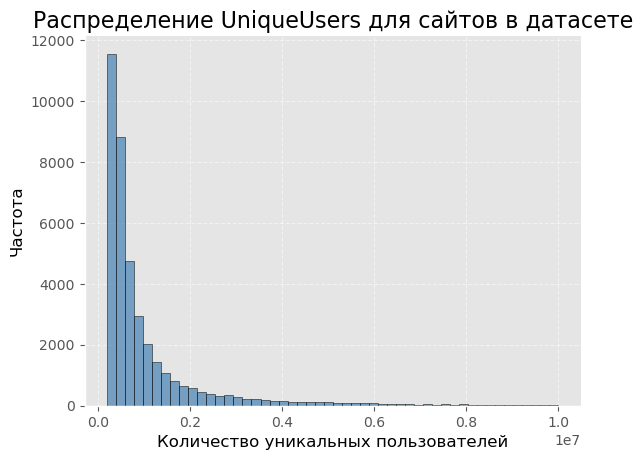

In [108]:
plt.style.use('ggplot')
fig, ax = plt.subplots()

ax.hist(data['UniqueUsers'].loc[data['UniqueUsers'] < 1e7], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
plt.title('Распределение UniqueUsers для сайтов в датасете', fontsize=16)

plt.xlabel('Количество уникальных пользователей', fontsize=12)
plt.ylabel('Частота', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)

plt.tick_params(axis='both', which='major', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=8)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

In [109]:
def pages_per_visit(data):
    """
    pages per visit for last month
    """
    err_counter = 0
    d = []
    for i in range(data.shape[0]):
        try:
            uu = data.loc[i, 'engagement'][list(data.loc[i, 'engagement'].keys())[
                0]]['PagesPerVisit']
            if uu is None:
                d.append(-1)
            else:
                d.append(uu)
        except:
            err_counter += 1
            d.append(-1)
    print('pages_per_visit: ', err_counter)
    return pd.Series(d)

In [110]:
# перезапишем pages_per_visit в нужном формате
data['PagesPerVisit'] = pages_per_visit(data)

pages_per_visit:  0


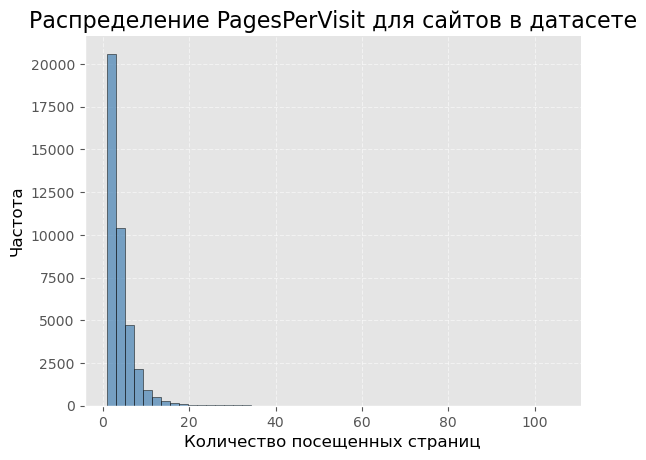

In [111]:
plt.style.use('ggplot')
fig, ax = plt.subplots()

ax.hist(data['PagesPerVisit'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
plt.title('Распределение PagesPerVisit для сайтов в датасете', fontsize=16)

plt.xlabel('Количество посещенных страниц', fontsize=12)
plt.ylabel('Частота', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)

plt.tick_params(axis='both', which='major', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=8)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

In [112]:
def bounce_rate(data):
    err_counter = 0
    e = []
    for i in range(data.shape[0]):
        try:
            uu = data.loc[i, 'engagement'][list(data.loc[i, 'engagement'].keys())[
                0]]['BounceRate']
            if uu is None:
                e.append(-1)
            else:
                e.append(uu)
        except:
            err_counter += 1
            e.append(-1)
    print('bounce_rate: ', err_counter)
    return pd.Series(e)

In [113]:
# перезапишем BounceRate в нужном формате
data['BounceRate'] = bounce_rate(data)

bounce_rate:  0


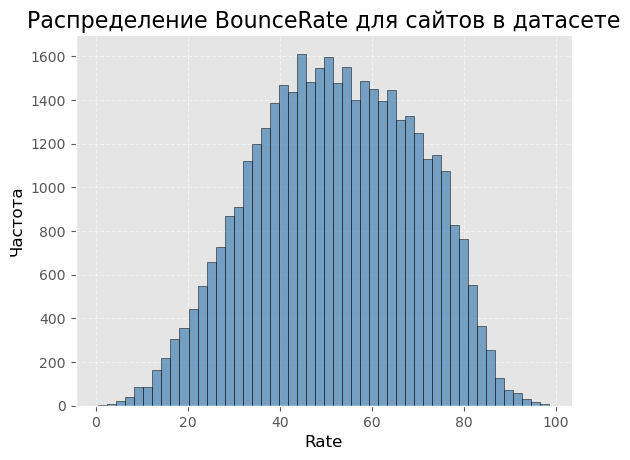

In [114]:
plt.style.use('ggplot')
fig, ax = plt.subplots()

ax.hist(data['BounceRate'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
plt.title('Распределение BounceRate для сайтов в датасете', fontsize=16)

plt.xlabel('Rate', fontsize=12)
plt.ylabel('Частота', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)

plt.tick_params(axis='both', which='major', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=8)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

In [115]:
def avg_visit_duration(data):
    err_counter = 0
    f = []
    for i in range(data.shape[0]):
        try:
            uu = data.loc[i, 'engagement'][list(data.loc[i, 'engagement'].keys())[
                0]]['AvgVisitDuration']
            if uu is None:
                f.append(-1)
            else:
                f.append(uu)
        except:
            err_counter += 1
            f.append(-1)
    print('avg_visit_duration: ', err_counter)
    return pd.Series(f)

In [116]:
# перезапишем avg_visit_duration в нужном формате
data['AvgVisitDuration'] = avg_visit_duration(data)

avg_visit_duration:  0


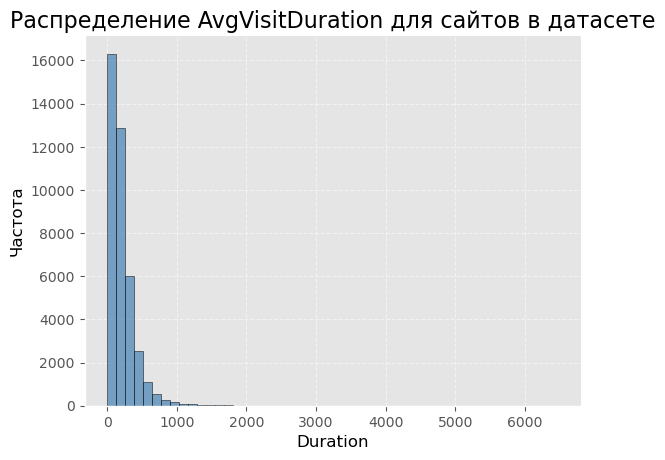

In [117]:
plt.style.use('ggplot')
fig, ax = plt.subplots()

ax.hist(data['AvgVisitDuration'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
plt.title('Распределение AvgVisitDuration для сайтов в датасете', fontsize=16)

plt.xlabel('Duration', fontsize=12)
plt.ylabel('Частота', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)

plt.tick_params(axis='both', which='major', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=8)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

In [118]:
def alexa_pop(data):
    h = []
    err_counter = 0
    for i in range(data.shape[0]):
        try:
            timestamp_lst = list(map(lambda x: tm.mktime(datetime.strptime(x, "%Y-%m-%d").timetuple()),
                                     list(data.loc[i, 'alexa'].keys())))
            max_1 = max(timestamp_lst)
            mean = data.loc[i, 'alexa'][datetime.fromtimestamp(
                max_1).strftime("%Y-%m-%d")]
            h.append(mean['popularityText'])
        except:
            h.append(-1)
            err_counter += 1
    print('alexa_pop: ', err_counter)
    return pd.Series(h)


In [119]:
# перезапишем alexa в нужном формате
data['Alexa'] = alexa_pop(data)

alexa_pop:  282


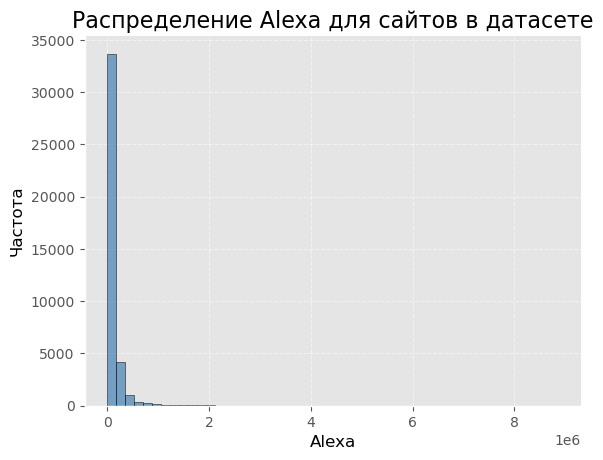

In [120]:
plt.style.use('ggplot')
fig, ax = plt.subplots()

ax.hist(data['Alexa'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
plt.title('Распределение Alexa для сайтов в датасете', fontsize=16)

plt.xlabel('Alexa', fontsize=12)
plt.ylabel('Частота', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)

plt.tick_params(axis='both', which='major', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=8)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

In [144]:
def category(data):
    h = []
    h1 = []

    err_counter = 0
    for i in range(data.shape[0]):
        h2 = []

        timestamp_lst = list(map(lambda x: tm.mktime(datetime.strptime(x, "%Y-%m-%d").timetuple()),
                                 list(data.loc[i, 'summary'].keys())))
        max_1 = max(timestamp_lst)
        mean = data.loc[i, 'summary'][datetime.fromtimestamp(
            max_1).strftime("%Y-%m-%d")]
        try:
            ind = list(mean['category']).index('/')
            h.append(''.join(list(mean['category'])[:ind]))
        except ValueError:
            ind = -1
            h.append(''.join(list(mean['category'])))
        try:
            h1.append(''.join(list(mean['category'])[ind + 1:]))
        except:
            h1.append(''.join(list(mean['category'])))

    print('err_counter: ', err_counter)
    return pd.Series(h), pd.Series(h1)

In [131]:
data['Summary'], data['Summary_2'] = category(data)

err_counter:  0


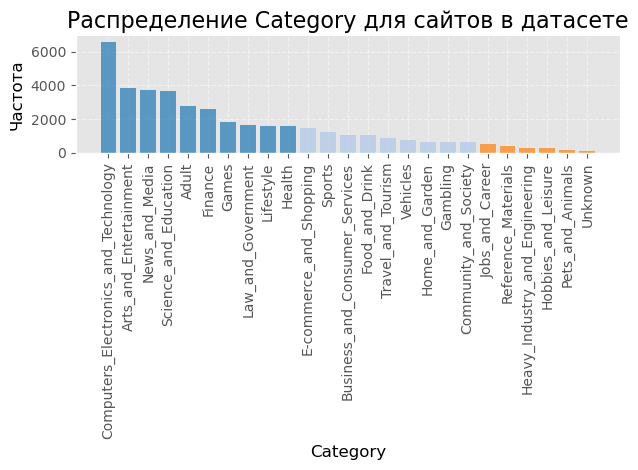

In [132]:
# Генерируем цвета для каждой категории
num_categories = len(categories)
colors = plt.cm.tab20(np.linspace(0, 1, num_categories))

plt.style.use('ggplot')
fig, ax = plt.subplots()

# Подсчитываем частоту для каждой категории
category_counts = data['Summary'].value_counts()

# График "bar" с раскрашенными категориями
ax.bar(category_counts.index, category_counts, color=colors, alpha=0.7)

plt.title('Распределение Category для сайтов в датасете', fontsize=16)

plt.xlabel('Category', fontsize=12)
plt.ylabel('Частота', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)

plt.tick_params(axis='both', which='major', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=8)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Поворачиваем названия категорий по оси X на 90 градусов
plt.xticks(rotation=90)

plt.tight_layout()

plt.show()

In [147]:
data.head()

,domain_name,visits,summary,engagement,alexa,UniqueUsers,PagesPerVisit,BounceRate,AvgVisitDuration,Alexa,Summary,Summary_2
0,google.com,8.907313e+10,{'2021-09-01': {'category': 'Computers_Electro...,"{'2021-09-01': {'AvgVisitDuration': 667, 'Page...",{'2021-09-01': {'popularityText': 1}},3.213322e+09,8.65,28.0,667,1,Computers_Electronics_and_Technology,Search_Engines
1,rutracker.net,4.662036e+06,{'2021-09-01': {'category': 'Computers_Electro...,"{'2021-09-01': {'AvgVisitDuration': 330, 'Page...",{'2021-09-01': {'popularityText': 6473}},1.058612e+06,7.14,20.6,330,6473,Computers_Electronics_and_Technology,File_Sharing_and_Hosting
2,ria.ru,1.270567e+08,{'2021-09-01': {'category': 'News_and_Media'}},"{'2021-09-01': {'AvgVisitDuration': 175, 'Page...",{'2021-09-01': {'popularityText': 372}},3.831120e+07,2.25,61.5,175,372,News_and_Media,News_and_Media
3,sportmaster.ru,8.239956e+06,{'2021-09-01': {'category': 'Sports/Sports'}},"{'2021-09-01': {'AvgVisitDuration': 384, 'Page...",{'2021-09-01': {'popularityText': 7074}},3.932260e+06,8.54,29.8,384,7074,Sports,Sports
4,olimpbet.kz,2.149507e+06,{'2021-09-01': {'category': 'Gambling/Sports_B...,"{'2021-09-01': {'AvgVisitDuration': 425, 'Page...",{'2021-09-01': {'popularityText': 54319}},5.233640e+05,38.94,41.3,425,54319,Gambling,Sports_Betting


In [148]:
data = data.drop(columns=['summary', 'engagement', 'alexa'])

## Вывод по данному этапу
- Функции были написаны для извлечения основных показателей веб-аналитики, таких как количество уникальных посетителей, количество посещений, количество просмотров на посещение, отказы и средняя продолжительность посещения. Эти метрики обычно используются для оценки привлекательности веб-сайта и уровня вовлеченности пользователей.

- В коде использованы блоки try/except для обработки ошибок при извлечении данных. Это позволяет программе продолжать работу даже при наличии проблем с отдельными записями данных. Ошибки подсчитываются и выводятся для каждой функции, что позволяет оценить объем "проблемных" данных.

- Были написаны функции для работы с данными сервиса Alexa. Судя по всему, эти данные используются для определения популярности веб-сайта и его категории.

- Функции для работы с категориями веб-сайтов также были написаны. Они извлекают основную и дополнительную категории, а также кодируют их для дальнейшего анализа.

- Весь код написан с учетом векторизации операций с использованием Pandas и Numpy, что должно обеспечивать высокую скорость обработки данных.

В общем, этот этап был в основном посвящен предобработке и извлечению признаков из исходных данных. 

## 1.3 Анализ данных

Мы уже посмотрели на распределения и они выглядят довольно натурально, похоже на экспоненциальное распределение

In [149]:
data.head()

,domain_name,visits,UniqueUsers,PagesPerVisit,BounceRate,AvgVisitDuration,Alexa,Summary,Summary_2
0,google.com,8.907313e+10,3.213322e+09,8.65,28.0,667,1,Computers_Electronics_and_Technology,Search_Engines
1,rutracker.net,4.662036e+06,1.058612e+06,7.14,20.6,330,6473,Computers_Electronics_and_Technology,File_Sharing_and_Hosting
2,ria.ru,1.270567e+08,3.831120e+07,2.25,61.5,175,372,News_and_Media,News_and_Media
3,sportmaster.ru,8.239956e+06,3.932260e+06,8.54,29.8,384,7074,Sports,Sports
4,olimpbet.kz,2.149507e+06,5.233640e+05,38.94,41.3,425,54319,Gambling,Sports_Betting


In [150]:
# Просмотр основной информации о данных
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40069 entries, 0 to 40068
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   domain_name       40069 non-null  object 
 1   visits            40069 non-null  float64
 2   UniqueUsers       40069 non-null  float64
 3   PagesPerVisit     40069 non-null  float64
 4   BounceRate        40069 non-null  float64
 5   AvgVisitDuration  40069 non-null  int64  
 6   Alexa             40069 non-null  int64  
 7   Summary           40069 non-null  object 
 8   Summary_2         40069 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 2.8+ MB
None


Все столбцы соответствуют своим типам, пропусков нет

In [152]:
# Статистические характеристики числовых столбцов
data.describe()


,visits,UniqueUsers,PagesPerVisit,BounceRate,AvgVisitDuration,Alexa
count,4.006900e+04,4.006900e+04,40069.000000,40069.000000,40069.000000,4.006900e+04
mean,1.145121e+07,2.006835e+06,4.022195,52.095073,211.538895,1.276060e+05
std,6.656706e+08,2.482040e+07,3.485198,17.440616,204.544161,3.647776e+05
min,3.797600e+04,2.000940e+05,1.020000,0.500000,0.000000,-1.000000e+00
25%,7.621240e+05,3.708310e+05,1.910000,39.200000,85.000000,2.411600e+04
50%,1.276152e+06,5.815510e+05,3.020000,52.200000,160.000000,5.772000e+04
75%,2.760444e+06,1.176962e+06,4.930000,65.700000,273.000000,1.236300e+05
max,8.907313e+10,3.213322e+09,105.440000,98.600000,6477.000000,8.861007e+06


Есть сайты у которых зашкаливает количество пользователей но это как раз топ сайты такие как google facebook youtube

In [155]:
# Проверка уникальности значений в столбцах
for col in data.columns:
    print(f'{col}: {data[col].nunique()} unique values')


domain_name: 40069 unique values
visits: 39762 unique values
UniqueUsers: 39404 unique values
PagesPerVisit: 1811 unique values
BounceRate: 916 unique values
AvgVisitDuration: 1238 unique values
Alexa: 39485 unique values
Summary: 25 unique values
Summary_2: 187 unique values


Выглядит правдоподобно

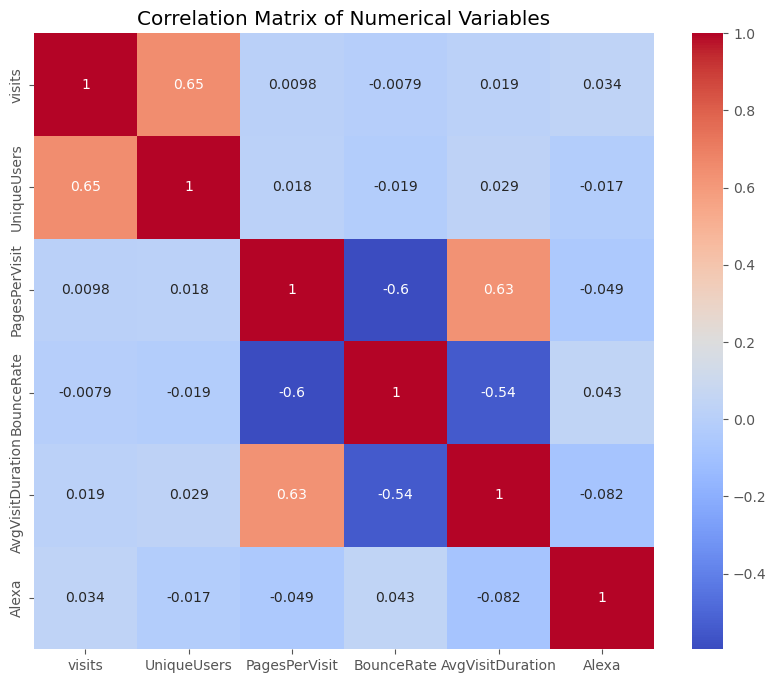

In [160]:
# Heatmap для визуализации корреляции числовых переменных
numerical_columns = ['visits', 'UniqueUsers', 'PagesPerVisit', 'BounceRate', 'AvgVisitDuration', 'Alexa']

plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

Видим довольно сильную корреляцию между 'PagesPerVisit' и 'AvgVisitDuration' а так же между 'UniqueUsers' и 'visits' что довольно ризонно. Но корреляция не такая сильная чтоб помешать нашим моделям МО, так что ничего не будем с этим делать

## 1.4. Исследование моделей машинного обучения:
Начнём с импортирования необходимых библиотек и модулей:

In [161]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [165]:
# Теперь, разделим ваши данные на обучающую и тестовую выборки:
X = pd.get_dummies(data.drop(['UniqueUsers', 'domain_name'], axis=1))
y = data['UniqueUsers']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Попробуем 3 модели посмотрим какая справится лучше

In [166]:
# Инициализация моделей
rf = RandomForestRegressor(random_state=42)
lr = LinearRegression()
cb = CatBoostRegressor(random_state=42, verbose=0)

# Словарь моделей
models = {'Random Forest': rf, 'Linear Regression': lr, 'CatBoost': cb}

# Обучение моделей и оценка MAE, MSE, RMSE на кросс-валидации
for name, model in models.items():
    model.fit(X_train, y_train)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    print(f'{name}:')
    print('MAE:', mean_absolute_error(y_test, model.predict(X_test)))
    print('MSE:', mean_squared_error(y_test, model.predict(X_test)))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, model.predict(X_test))))
    print('Cross-validation RMSE:', np.sqrt(-cv_scores.mean()))
    print('----------------------------------')


Random Forest:
MAE: 470522.1560606439
MSE: 15283380582681.834
RMSE: 3909396.447366503
Cross-validation RMSE: 17817446.323096223
----------------------------------
Linear Regression:
MAE: 1988195.2314601853
MSE: 69434283530268.53
RMSE: 8332723.656180405
Cross-validation RMSE: 40452645.75694348
----------------------------------
CatBoost:
MAE: 615711.7948781498
MSE: 27430665606967.223
RMSE: 5237429.2937439475
Cross-validation RMSE: 21961439.388832785
----------------------------------


Лучше всего справились модели catboost и randomforest, но справились они примерно одинаково. Также в нашей задаче играет важную роль скорость и меньшая предрасположенность к переобучению и по обеим характеристикам лучше градиентный бустинг, по этому отдадим предпочтение Catboost

1.5. Финальная валидация и сохранение модели:

Проверим еще и r2_score

In [175]:
from sklearn.metrics import r2_score

print('Catboost r2_score: ', r2_score(y_test, cb.predict(X_test)))

Catboost r2_score:  0.6757264860374772


Не плохой результат, дальше будем валидировать модель в пилотной эксплуатации

In [176]:
import joblib

# Переобучение моделей на всем датасете
cb.fit(X, y)

# Сохранение модели
joblib.dump(cb, 'catboost_model.pkl')

['catboost_model.pkl']